In [1]:
# get multiclass data
# clean and normalize
# build network with optimizations
# test
# use real data

In [368]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import keras.backend as K
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, History
from keras.optimizers import SGD, Adam

In [4]:
raw = pd.read_csv('C:/Users/Philippe/Dropbox/Desktop/datasets/bank-additional-full.csv', 
                 delimiter=';')

In [8]:
raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [19]:
raw['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
# y, job

In [31]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
         'euribor3m', 'nr.employed']

cat_cols = ['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

In [32]:
df_num = raw[num_cols]

In [33]:
df_num.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,1.1,93.994,-36.4,4.857,5191.0


In [38]:
sc = preprocessing.StandardScaler()
X_nums = sc.fit_transform(df_num)

C:\Users\Philippe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Philippe\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
df_cat = raw[cat_cols]

In [71]:
df_cat.values

(41188, 7)

In [83]:
enc = preprocessing.OneHotEncoder()
enc.fit(df_cat.values)
X_cats = enc.transform(df_cat.values).toarray()

In [65]:
# enc = preprocessing.OneHotEncoder()
# X = [['Male', 1], ['Female', 3], ['Female', 2]]
# enc.fit(X)
# labels = enc.transform(X).toarray()

In [84]:
print('num shape', X_nums.shape)
print('cat shape', X_cats.shape)

num shape (41188, 9)
cat shape (41188, 101)


In [85]:
X = np.concatenate((X_nums, X_cats), axis=1)

In [86]:
X.shape

(41188, 110)

In [101]:
y_cat = raw['y']
y_job = raw['job']

In [95]:
enc.fit(y_cat.values.reshape(41188, 1))
y1 = enc.transform(y_cat.values.reshape(41188, 1)).toarray()

In [102]:
enc.fit(y_job.values.reshape(41188, 1))
y_job = enc.transform(y_job.values.reshape(41188, 1)).toarray()

In [127]:
# Y = np.concatenate((y1, y_job), axis=1)

In [289]:
Y = y1

### Single Category, Multiclass Model

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3)

In [291]:
X_train.shape

(28831, 110)

In [305]:
K.clear_session()

model = Sequential()
model.add(Dense(110, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(75, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.0))
model.add(BatchNormalization())

model.add(Dense(55, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(55, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(25, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))

model.compile(Adam(lr=0.1), 'binary_crossentropy', metrics=['accuracy'])

In [306]:
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1)

Train on 25947 samples, validate on 2884 samples
Epoch 1/10
25947/25947 [==============================] - 4s 138us/step - loss: 0.2337 - acc: 0.8935 - val_loss: 0.3328 - val_acc: 0.8540
Epoch 2/10
25947/25947 [==============================] - 2s 76us/step - loss: 0.2164 - acc: 0.8994 - val_loss: 0.1993 - val_acc: 0.9105
Epoch 3/10
25947/25947 [==============================] - 2s 76us/step - loss: 0.2117 - acc: 0.9006 - val_loss: 0.1987 - val_acc: 0.9067
Epoch 4/10
25947/25947 [==============================] - 2s 77us/step - loss: 0.2098 - acc: 0.9011 - val_loss: 0.1976 - val_acc: 0.9105
Epoch 5/10
25947/25947 [==============================] - 2s 80us/step - loss: 0.2083 - acc: 0.9017 - val_loss: 0.2162 - val_acc: 0.9130
Epoch 6/10
25947/25947 [==============================] - 2s 82us/step - loss: 0.2079 - acc: 0.9032 - val_loss: 0.2067 - val_acc: 0.9088
Epoch 7/10
25947/25947 [==============================] - 2s 76us/step - loss: 0.2048 - acc: 0.9029 - val_loss: 0.2280 - val_acc

In [308]:
results = model.evaluate(X_test, y_test)
results

12357/12357 [==============================] - 0s 31us/step


[0.2710627137027706, 0.9062879339669663]

### Multiclass and Multicategory Model

In [207]:
# y_labels = raw['y'].unique()
# job_labels = raw['job'].unique()
# labels = [ (i, j) for j in job_labels for i in y_labels]
# print('# of labels:', len(labels))
# labels

# of labels: 24


[('no', 'housemaid'),
 ('yes', 'housemaid'),
 ('no', 'services'),
 ('yes', 'services'),
 ('no', 'admin.'),
 ('yes', 'admin.'),
 ('no', 'blue-collar'),
 ('yes', 'blue-collar'),
 ('no', 'technician'),
 ('yes', 'technician'),
 ('no', 'retired'),
 ('yes', 'retired'),
 ('no', 'management'),
 ('yes', 'management'),
 ('no', 'unemployed'),
 ('yes', 'unemployed'),
 ('no', 'self-employed'),
 ('yes', 'self-employed'),
 ('no', 'unknown'),
 ('yes', 'unknown'),
 ('no', 'entrepreneur'),
 ('yes', 'entrepreneur'),
 ('no', 'student'),
 ('yes', 'student')]

In [319]:
mlb = preprocessing.MultiLabelBinarizer()
# mlb.fit(labels)
# mlb.transform([('no', 'self-employed'), ('yes', 'student')])

In [321]:
y = raw['y'].values
jobs = raw['job'].values
Y_cat = list(zip(y, jobs))
Y_cat[0]
Y = mlb.fit_transform(Y_cat)
print(Y_cat[0])
print(Y[0])
classes = mlb.classes_
classes

('no', 'housemaid')
[0 0 0 1 0 1 0 0 0 0 0 0 0 0]


array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'no', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'yes'], dtype=object)

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [354]:
K.clear_session()

model = Sequential()
model.add(Dense(110, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(75, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(55, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(25, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(Dense(14, activation='sigmoid'))

history = History()
early = EarlyStopping()

model.compile(Adam(lr=0.1), 'binary_crossentropy', metrics=['accuracy'],
             callbacks=[history, early])

In [369]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 110)               12210     
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
dense_2 (Dense)              (None, 75)                8325      
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 55)                4180      
__________

In [394]:
h = model.fit(X_train, Y_train, batch_size=4096, epochs=30, verbose=1, validation_split=0.1)

Train on 25947 samples, validate on 2884 samples
Epoch 1/30
25947/25947 [==============================] - 0s 12us/step - loss: 0.1719 - acc: 0.9338 - val_loss: 0.1938 - val_acc: 0.9262
Epoch 2/30
25947/25947 [==============================] - 0s 14us/step - loss: 0.1721 - acc: 0.9341 - val_loss: 0.1940 - val_acc: 0.9261
Epoch 3/30
25947/25947 [==============================] - 0s 14us/step - loss: 0.1720 - acc: 0.9340 - val_loss: 0.1937 - val_acc: 0.9263
Epoch 4/30
25947/25947 [==============================] - 0s 15us/step - loss: 0.1720 - acc: 0.9338 - val_loss: 0.1936 - val_acc: 0.9263
Epoch 5/30
25947/25947 [==============================] - 0s 16us/step - loss: 0.1719 - acc: 0.9340 - val_loss: 0.1937 - val_acc: 0.9263
Epoch 6/30
25947/25947 [==============================] - 0s 16us/step - loss: 0.1713 - acc: 0.9343 - val_loss: 0.1940 - val_acc: 0.9260
Epoch 7/30
25947/25947 [==============================] - 0s 16us/step - loss: 0.1717 - acc: 0.9340 - val_loss: 0.1939 - val_acc:

In [395]:
model.evaluate(X_test, Y_test)

12357/12357 [==============================] - 0s 28us/step


[0.19299870487786405, 0.9265540370646347]

In [396]:
Y_test_pred = model.predict(X_test)

In [397]:
Y_test_pred[13]

array([4.31e-01, 7.22e-02, 9.91e-03, 1.19e-02, 1.13e-02, 3.77e-01,
       5.54e-04, 1.07e-02, 2.95e-01, 6.86e-02, 4.72e-02, 3.14e-02,
       1.63e-03, 6.23e-01], dtype=float32)

In [398]:
Y_test[13]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [399]:
# 12300, 12301, 1201
n = 353
check = Y_test[n]
for i in range(check.shape[0]):
    if check[i] == 1:
        print(classes[i])

# for j in range(check.shape[0]):
#     print(classes[j], Y_test[n][j], Y_test_pred[n][j])
# print(Y_test[n])
# print(Y_test_pred[n])
d = { 
    'classes': classes,
    'labels': Y_test[n],
    'probs': Y_test_pred[n]
}
pd.DataFrame(d)

technician
yes


,classes,labels,probs
0,admin.,0,0.078147
1,blue-collar,0,0.173297
2,entrepreneur,0,0.032751
3,housemaid,0,0.004311
4,management,0,0.024180
5,no,0,0.860896
6,retired,0,0.002324
7,self-employed,0,0.041432
8,services,0,0.052150
9,student,0,0.002295


In [400]:
classes

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'no', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'yes'], dtype=object)

In [401]:
for counter, value in enumerate(classes):
    print(counter, value)


0 admin.
1 blue-collar
2 entrepreneur
3 housemaid
4 management
5 no
6 retired
7 self-employed
8 services
9 student
10 technician
11 unemployed
12 unknown
13 yes


In [402]:
# np.set_printoptions(2)

In [403]:
history = h

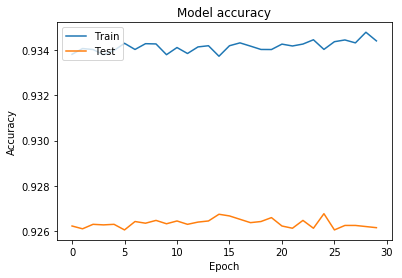

In [404]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

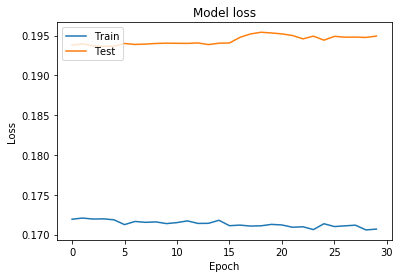

In [405]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()